<a href="https://colab.research.google.com/github/pravincoder/Fundamentals_tensorflow/blob/main/Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression 
### Whats to cover in this notebook?
* Architecture of neural network regression model.
* Input/Output shapes of regression model.
* Creating custom data to view and fit. 
* (Modeling) Creating a model,compiling,fitting and evaluating the model.
* Different evaluation method
* (IMP) Saving and loading a model

# Introduction to Regression with Neural Network in Tensorflow

 The simple defination is prediction of the numerial value based on various combinations of variables (both relational and non-realtional) .



In [102]:
# import tensorflow , numpy,matplotlib.pyplot
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [103]:
# Create features
X = np.array([-7.0,-4.0,-1.0,2.,3.,4.,6.,8.,11.0,14.])
Y = np.array([2.0,5.0,8.0,11.0,12.,13.,15.,17.,20.,23.])

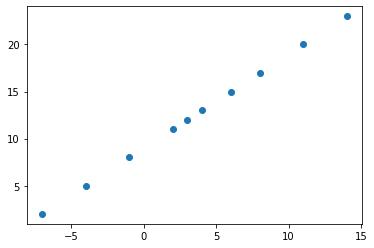

In [104]:
# Visual the data
plt.scatter(X,Y)

In [105]:
Y == X+9

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# Input and Output Shape

In [106]:
# Create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([934000])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([934000], dtype=int32)>)

In [107]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape,output_shape

((), ())

In [108]:
X[0].ndim # Given input is a numpy array not a tensor

0

In [109]:
X,Y

(array([-7., -4., -1.,  2.,  3.,  4.,  6.,  8., 11., 14.]),
 array([ 2.,  5.,  8., 11., 12., 13., 15., 17., 20., 23.]))

In [110]:
# Turn our Numpy array to Tensor
X= tf.constant(X)
Y= tf.constant(Y)

X = tf.cast(X,dtype=tf.float32)
Y = tf.cast(Y,dtype=tf.float32)
X.shape,Y.shape

(TensorShape([10]), TensorShape([10]))

# Steps in Modeling with Tensorflow

* **Creating a Model** - define the input and output layers, as well as the hidden layers of the deep learning model.
* **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the Optimizer(tells our model how to improve in reading the patterns) and evaluation metrics (what we can use to interpret the preformance of our model).
* **Fitting a Model** - letting the model try to find the pattern btw Features and Label(X & Y).

In [111]:
# Set Random Seed
tf.random.set_seed(42)

# Create a model using Sequential API
model= tf.keras.Sequential([ tf.keras.layers.Dense(1,input_shape=(1,))])

# Compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model.fit(X,Y,epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 567ms/step - loss: 8.1716 - mae: 8.1716
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 8.0320 - mae: 8.0320
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 7.8924 - mae: 7.8924
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 7.7528 - mae: 7.7528
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 7.6132 - mae: 7.6132


In [112]:
# try and make prediction
model.predict([17.0])
# output should be 17+9=26 

1/1 [==============================] - 0s 82ms/step


array([[24.021864]], dtype=float32)

# Improve our Model

We can improve our model , by altering the steps we took to create a model

* **Creating the Model** - we might add more layers,increase the number of hidden units (all called neurons) within each of the hidden layers,change the activation function of each layer

* **Compiling a Model** - we should try changing the optimization function or perhaps the **learning rate** of the Optimization function.

* **Fitting a Model** - we might fit the model for more **epochs** (leave it training for longer)  or on more data. 

In [113]:
# Just increasing the epochs to 100 that is 10x and checking the model prediction
# Create a model using Sequential API
model2= tf.keras.Sequential([ tf.keras.layers.Dense(1,input_shape=(1,))])

# Compile the model
model2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model2.fit(X,Y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 386ms/step - loss: 7.5512 - mae: 7.5512
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4116 - mae: 7.4116
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 7.2720 - mae: 7.2720
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 7.1324 - mae: 7.1324
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 6.9928 - mae: 6.9928
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 6.8532 - mae: 6.8532
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 6.7136 - mae: 6.7136
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 6.6204 - mae: 6.6204
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 6.6076 - mae: 6.6076
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 6.5948 - mae: 6.5948
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - l

In [114]:
# Check the prediction of model2
model2.predict([17.0])

1/1 [==============================] - 0s 100ms/step


array([[30.307678]], dtype=float32)

# Creating a Larger Model

In [115]:
# improved Model by increasing the dense.layers
# Only increased the dense layers and neurons with increase in epochs
# Set Random Seed
tf.random.set_seed(42)

# Create a model using Sequential API
model3= tf.keras.Sequential([ tf.keras.layers.Dense(1,input_shape=(1,)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)])

# Compile the model
model3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model3.fit(X,Y,epochs=150)


Epoch 1/150
1/1 [==============================] - 1s 562ms/step - loss: 14.3870 - mae: 14.3870
Epoch 2/150
1/1 [==============================] - 0s 13ms/step - loss: 11.8453 - mae: 11.8453
Epoch 3/150
1/1 [==============================] - 0s 10ms/step - loss: 9.6634 - mae: 9.6634
Epoch 4/150
1/1 [==============================] - 0s 421ms/step - loss: 7.2195 - mae: 7.2195
Epoch 5/150
1/1 [==============================] - 0s 13ms/step - loss: 4.6359 - mae: 4.6359
Epoch 6/150
1/1 [==============================] - 0s 12ms/step - loss: 4.7074 - mae: 4.7074
Epoch 7/150
1/1 [==============================] - 0s 13ms/step - loss: 4.5741 - mae: 4.5741
Epoch 8/150
1/1 [==============================] - 0s 12ms/step - loss: 4.5973 - mae: 4.5973
Epoch 9/150
1/1 [==============================] - 0s 14ms/step - loss: 4.6047 - mae: 4.6047
Epoch 10/150
1/1 [==============================] - 0s 11ms/step - loss: 4.5209 - mae: 4.5209
Epoch 11/150
1/1 [==============================] - 0s 9ms/step

In [116]:
# try and make prediction with model3
model3.predict([17.0])
# output should be 17+9=26 

1/1 [==============================] - 0s 110ms/step


array([[29.901136]], dtype=float32)

In [117]:
# increased the epochs
# increased the dense layer (10,20,10)
# Changed the optimizer to experimental.AdamW check more optimizer on tf/optimizers
tf.random.set_seed(42)

# Create a model using Sequential API
model4= tf.keras.Sequential([ tf.keras.layers.Dense(1,input_shape=(1,)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)])

# Compile the model
model4.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.experimental.AdamW(),
              metrics=['mae'])

# Fit the model
model4.fit(X,Y,epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 13.2004 - mae: 13.2004
Epoch 2/300
1/1 [==============================] - 0s 11ms/step - loss: 13.1750 - mae: 13.1750
Epoch 3/300
1/1 [==============================] - 0s 15ms/step - loss: 13.1497 - mae: 13.1497
Epoch 4/300
1/1 [==============================] - 0s 11ms/step - loss: 13.1246 - mae: 13.1246
Epoch 5/300
1/1 [==============================] - 0s 12ms/step - loss: 13.0987 - mae: 13.0987
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 13.0719 - mae: 13.0719
Epoch 7/300
1/1 [==============================] - 0s 9ms/step - loss: 13.0453 - mae: 13.0453
Epoch 8/300
1/1 [==============================] - 0s 15ms/step - loss: 13.0194 - mae: 13.0194
Epoch 9/300
1/1 [==============================] - 0s 13ms/step - loss: 12.9961 - mae: 12.9961
Epoch 10/300
1/1 [==============================] - 0s 17ms/step - loss: 12.9728 - mae: 12.9728
Epoch 11/300
1/1 [==============================] - 

In [118]:
# make Predictions
print(model4.predict([17.0]))
# 17+9 =26 perfect model with loss=0.09 
# here is the most appropreate model after 4 model
print(model4.predict([20.0]))
# try on given data

print(model4.predict(X[6:7].numpy()))

1/1 [==============================] - 0s 188ms/step
[[32.95126]]
1/1 [==============================] - 0s 73ms/step
[[38.303]]
1/1 [==============================] - 0s 45ms/step
[[13.328183]]


# Evaluation of models

### Typical WorkFlow of any Neural Network Model 

```
Build a model --> fit it --> evaluate it --> tweak it --> fit again -->tweak .... so on until you get a satisfied result. 
```

### But when Evaluating a model we only use,

* `Visualization`

## Reasons for Visualization 

* `Data` - what data are we working on ? , what does it look like?
* `Model` - what should our model look like?
* `Traning ` - how does a model perform while it learns?
* `Prediction` - how do the prediction of the model line up against the ground truth(The original Labels)? (Used in above model for X=17, then Y =26).          

In [119]:
# Make a bigger dataset
X = tf.range(-100, 200, 5)
X

<tf.Tensor: shape=(60,), dtype=int32, numpy=
array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
         65,   70,   75,   80,   85,   90,   95,  100,  105,  110,  115,
        120,  125,  130,  135,  140,  145,  150,  155,  160,  165,  170,
        175,  180,  185,  190,  195], dtype=int32)>

In [120]:
y = X + 10
y

<tf.Tensor: shape=(60,), dtype=int32, numpy=
array([-90, -85, -80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30,
       -25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35,
        40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100,
       105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165,
       170, 175, 180, 185, 190, 195, 200, 205], dtype=int32)>

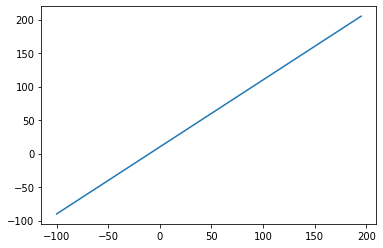

In [121]:
import matplotlib.pyplot as plt

plt.plot(X, y)

## Typical split of any DataSet
 * **Training Set** - the model learns from this data, which is typically 70-80% of the total data you have available
 * **Validation Set** - the model gets tuned on this data, which is typically 10-15% of the data available.
 * **Testing Set**- the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [122]:
# Split the data into train and test sets
X_train = X[:45] # first 40 are training samples (80% of the data) 
y_train = y[:45]

X_test = X[45:] # last 10 are testing samples (20% of the data)
y_test = y[45:]

len(X_train), len(X_test), len(y_train), len(y_test)

(45, 15, 45, 15)

# Visualizing the different set of data
Now we've got our data in training and test sets... let's visualize it again!

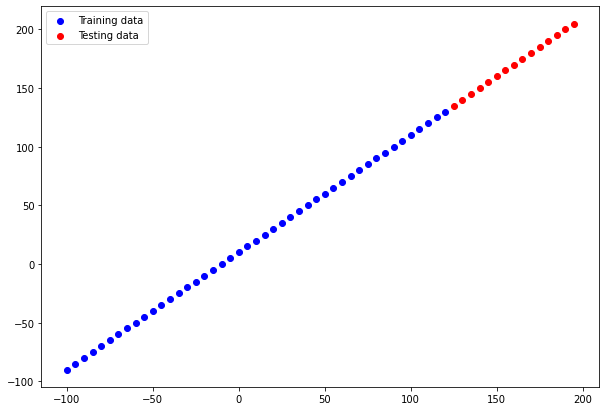

In [123]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c="r", label="Testing data") # want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend();
     

In [124]:

# Let's have a look at how to build a neural network for our data

# 1. Create a model
model5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape=(1,),name='Input_layer'),
  tf.keras.layers.Dense(90,activation='relu',name="Dense_l1"),
  tf.keras.layers.Dense(180,activation='relu',name="Dense_l2"),
  tf.keras.layers.Dense(90,activation='relu',name="Dense_l3"),
  tf.keras.layers.Dense(1,name='Output_layer')                             
],name="Model_5")

# 2. Compile the model
model5.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.experimental.AdamW(),
              metrics=["mae"])

# # 3. Fit the model
model5.fit(X_train, y_train, epochs=170)

Epoch 1/170
2/2 [==============================] - 2s 13ms/step - loss: 58.0801 - mae: 58.0801
Epoch 2/170
2/2 [==============================] - 0s 11ms/step - loss: 55.4707 - mae: 55.4707
Epoch 3/170
2/2 [==============================] - 0s 12ms/step - loss: 53.4050 - mae: 53.4050
Epoch 4/170
2/2 [==============================] - 0s 10ms/step - loss: 51.4747 - mae: 51.4747
Epoch 5/170
2/2 [==============================] - 0s 11ms/step - loss: 49.3585 - mae: 49.3585
Epoch 6/170
2/2 [==============================] - 0s 13ms/step - loss: 47.2005 - mae: 47.2005
Epoch 7/170
2/2 [==============================] - 0s 15ms/step - loss: 44.7464 - mae: 44.7464
Epoch 8/170
2/2 [==============================] - 0s 27ms/step - loss: 42.0843 - mae: 42.0843
Epoch 9/170
2/2 [==============================] - 0s 37ms/step - loss: 38.8031 - mae: 38.8031
Epoch 10/170
2/2 [==============================] - 0s 40ms/step - loss: 35.2684 - mae: 35.2684
Epoch 11/170
2/2 [==============================]

In [125]:
model5.summary()

Model: "Model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 1)                 2         
                                                                 
 Dense_l1 (Dense)            (None, 90)                180       
                                                                 
 Dense_l2 (Dense)            (None, 180)               16380     
                                                                 
 Dense_l3 (Dense)            (None, 90)                16290     
                                                                 
 Output_layer (Dense)        (None, 1)                 91        
                                                                 
Total params: 32,943
Trainable params: 32,943
Non-trainable params: 0
_________________________________________________________________


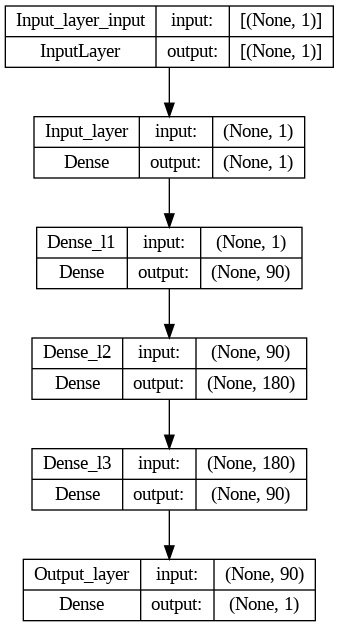

In [126]:
from tensorflow.keras.utils import plot_model
plot_model(model=model5,show_shapes=True,to_file='molel.png')

# Visualizing our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred (ground truth versus your model's predictions).

In [127]:
y_pred = model5.predict(X_test)
y_pred,y_test

1/1 [==============================] - 0s 85ms/step


(array([[137.11826],
        [142.20238],
        [147.28647],
        [152.37059],
        [157.45471],
        [162.5388 ],
        [167.62292],
        [172.70703],
        [177.79114],
        [182.87524],
        [187.95938],
        [193.04836],
        [198.13818],
        [203.22797],
        [208.31778]], dtype=float32),
 <tf.Tensor: shape=(15,), dtype=int32, numpy=
 array([135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
        200, 205], dtype=int32)>)

# Let's create a Ploting function

If we want to use a functionality many time it better to create a function.






In [128]:
# Plotting function
def plot_predict(train_data=X_train,test_data=X_test,train_label=y_train,test_label=y_test,predict = y_pred):
  """Plots training data, ,test data and compares predictions to ground Truth labels."""
  plt.figure(figsize=(10,7))
  #plot the training data in blue
  plt.scatter(train_data,train_label,c='b',label='Training data')
  #plot the testing data in red
  plt.scatter(test_data,test_label,c='r',label='Testing Data')
  #plot the model prediction in green
  plt.scatter(test_data,predict,c='g',label="Prediction",marker='^')
  #plot the legend
  plt.legend();

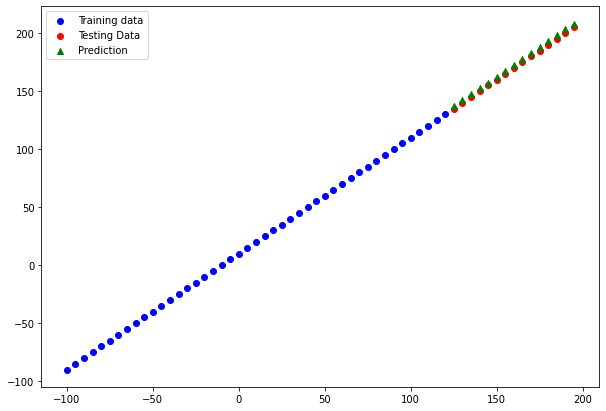

In [129]:
plot_predict(train_data=X_train,test_data=X_test,train_label=y_train,test_label=y_test,predict = y_pred)

# Evaluating our models prediction with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* **MAE**- mean absolute error, "on average, how wrong is each of my model's predictions"
* **MSE**- mean square error, "square the average errors"

In [130]:
model5.evaluate(X_test,y_test)

1/1 [==============================] - 0s 149ms/step - loss: 2.7106 - mae: 2.7106


[2.710616111755371, 2.710616111755371]

In [131]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test,tf.constant(y_pred))
mae

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([33.164177, 29.051592, 25.628119, 22.893726, 20.848429, 19.49224 ,
       18.825138, 18.847136, 19.558228, 20.958414, 23.04771 , 25.829012,
       29.301334, 33.464237, 38.317783], dtype=float32)>

In [132]:
# differnet shape so we are getting such big value
y_prediction = tf.squeeze(y_pred)
y_prediction,y_test

(<tf.Tensor: shape=(15,), dtype=float32, numpy=
 array([137.11826, 142.20238, 147.28647, 152.37059, 157.45471, 162.5388 ,
        167.62292, 172.70703, 177.79114, 182.87524, 187.95938, 193.04836,
        198.13818, 203.22797, 208.31778], dtype=float32)>,
 <tf.Tensor: shape=(15,), dtype=int32, numpy=
 array([135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
        200, 205], dtype=int32)>)

In [133]:
# ReCalculating the mean absolute error
mae = tf.keras.losses.mean_absolute_error(y_test,y_prediction)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.710614>

In [134]:
# Calucate the mean square error
mse = tf.metrics.mean_squared_error(y_test,y_prediction)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=7.4831667>

# Tips to improve any model

1. `More Data` - get more examples for your model to train on(more opportunities to learn patttern or relationships btw features and labels).
2. `Enlarge your Model` - (using complex model) this includes increasing different layers,hidden layers or more hidden units in each layer.
3. `Train longer` - give your model more of a chance to find patterns in data.


# Tracking Your Experiments 

**Tip💁‍♂️**

* `TensorBoard` - a component of the tensorflow library to help track modelling experiments (Future).
* `Weight & Biases` -  a tool for tracking all kinds of machine learning experiments(plugs striaght into tensorboard).

## Saving Model

Saving our model for using it anywhere we want to use or model in web or app etc.

There are to different format to save a model format.

1.The SavedModel format.

2.The HDF5 format.


In [135]:
# Saving the model using SavedModel format
model5.save('First model with 0.9 acc')

In [136]:
# save the model using HDF5 fromat
model5.save('First_model_0.9acc.h5')

# Loading in a saved Model


In [137]:
# loading the SavedModel format
loaded_SavedModel = tf.keras.models.load_model('First model with 0.9 acc')
loaded_SavedModel.predict([120])


1/1 [==============================] - 0s 111ms/step


array([[132.03416]], dtype=float32)

In [138]:
# Compare model5 with the loaded model as weight are also saved
model5_pred = model5.predict(X_test)
loadedModel_pred = loaded_SavedModel(X_test)
model5_pred == loadedModel_pred

1/1 [==============================] - 0s 32ms/step


<tf.Tensor: shape=(15, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

In [139]:
# loading the the h5 format
loaded_h5_model = tf.keras.models.load_model('First_model_0.9acc.h5')
loaded_h5_model.summary(),loaded_h5_model.predict([120])


Model: "Model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 1)                 2         
                                                                 
 Dense_l1 (Dense)            (None, 90)                180       
                                                                 
 Dense_l2 (Dense)            (None, 180)               16380     
                                                                 
 Dense_l3 (Dense)            (None, 90)                16290     
                                                                 
 Output_layer (Dense)        (None, 1)                 91        
                                                                 
Total params: 32,943
Trainable params: 32,943
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 98ms/step


(None, array([[132.03416]], dtype=float32))

In [140]:
model5_pred = model5.predict(X_test)
loaded_modelh5_pred = loaded_h5_model.predict(X_test)
model5_pred == loaded_modelh5_pred

1/1 [==============================] - 0s 83ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a Model (or any other file) from Colab

If you want to download your files from Google Colab:

1. You can go to the "Files" tab and right click to the files you're after and click "download".

2. Use code below.

* `from google.colab import files`
* `files.download(file_path)` 

  Ex:- `files.download('/content/xyz.h5')`

3. Save it to Google drive by connecting the google Drive and Copying it there.
> Click "Mount to drive" icon in files tab.
> Move the required file to drive.  

In [141]:
from google.colab import files
files.download('/content/First_model_0.9acc.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# A larger Example 

In [142]:
# Import the required dependiences for large model
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [143]:
# read the insurance dataset 
insurance_data = pd.read_csv('/content/drive/MyDrive/tf/insurance.csv')
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**Note:-**Using pandas dummies with one-hot encoding of tensorflow on sex,smoker,region.(`dtype`object-->int64)

In [144]:
insurance = pd.get_dummies(insurance_data)

In [145]:
# Create a X & y values(features and labels)
# feature include (age	bmi	children	sex_female	sex_male	smoker_no	smoker_yes	region_northeast	region_northwest	region_southeast	region_southwest)
# label (charges)
X = insurance.drop('charges',axis=1)
y = insurance['charges']


**Note** :- Using a scikit learn train&test split method to spilt the insurance data into testing and training data 

In [146]:
# creating training and test data set using sklearn
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# Check Split
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [147]:
X_train.shape

(1070, 11)

In [101]:
from keras.layers.attention.multi_head_attention import activation
# Build a neural network 
tf.random.set_seed(42)
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(11,input_shape=(11,),name='Input_layer'),
    tf.keras.layers.Dense(121,activation='relu',name='D1'),
    tf.keras.layers.Dense(11,activation='relu',name='D2'),
    tf.keras.layers.Dense(1,name='Output_layer')
],name='Insurance_Predictor')

# Compile
insurance_model.compile(optimizer=tf.keras.optimizers.experimental.Adam(),loss='mae',metrics=['mae'])

# Fit the model
history=insurance_model.fit(X_train,y_train,epochs=500)

Epoch 1/500
34/34 [==============================] - 3s 5ms/step - loss: 13309.4316 - mae: 13309.4316
Epoch 2/500
34/34 [==============================] - 0s 7ms/step - loss: 13197.8945 - mae: 13197.8945
Epoch 3/500
34/34 [==============================] - 0s 6ms/step - loss: 12865.5547 - mae: 12865.5547
Epoch 4/500
34/34 [==============================] - 0s 6ms/step - loss: 11985.5537 - mae: 11985.5537
Epoch 5/500
34/34 [==============================] - 0s 6ms/step - loss: 10202.0059 - mae: 10202.0059
Epoch 6/500
34/34 [==============================] - 0s 6ms/step - loss: 8116.9712 - mae: 8116.9712
Epoch 7/500
34/34 [==============================] - 0s 6ms/step - loss: 7472.7690 - mae: 7472.7690
Epoch 8/500
34/34 [==============================] - 0s 7ms/step - loss: 7446.3779 - mae: 7446.3779
Epoch 9/500
34/34 [==============================] - 0s 6ms/step - loss: 7424.2202 - mae: 7424.2202
Epoch 10/500
34/34 [==============================] - 0s 7ms/step - loss: 7405.2139 - mae:

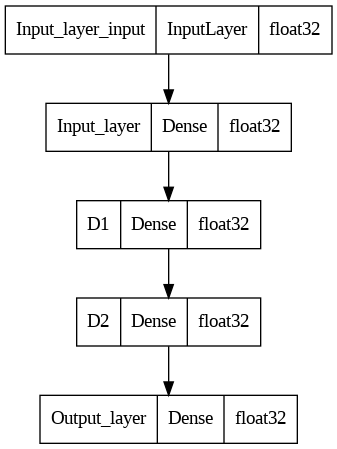

In [148]:
from tensorflow.keras.utils import plot_model
plot_model(insurance_model,show_dtype=True)

In [149]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1997.1360 - mae: 1997.1360


[1997.135986328125, 1997.135986328125]

In [94]:
insurance_model.predict(X_test.head()),y_test.head()


1/1 [==============================] - 0s 73ms/step


(array([[ 8994.93  ],
        [ 5224.4194],
        [29061.273 ],
        [ 9220.721 ],
        [31037.207 ]], dtype=float32),           charges
 764    9095.06825
 887    5272.17580
 890   29330.98315
 1293   9301.89355
 259   33750.29180)

Text(0.5, 0, 'epochs')

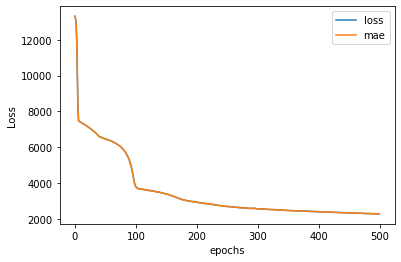

In [150]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs")

>🤔 **Question:** How long should you train for?

It depends Really.. it depends on the problem you're working on.However, there is solution it is called [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping).

A tf component you can use to stop training once it stop improving

## Preprocessing Data (Normalization and Standardization)

In terms of scaling values neural network tends to prefer normalization.

If you're not sure on which to use , you could try both and see which perform better(StandardScaler,MinMaxScaler) sklearn.

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read csv
insurance = pd.read_csv('/content/drive/MyDrive/tf/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Normalizing

In [161]:
# to preapare our data , we need to to import some classes from scikit-learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct =make_column_transformer((MinMaxScaler(),['age','bmi','children']), # turn all values in these column btw 0 and 1
                     (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)   

# Create X & y
X = insurance.drop('charges',axis=1) 
y = insurance['charges'] 

# train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# fit the colomn Transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [167]:
# Checking how our data looks now?
X_train.loc[0],X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [169]:
#lets check the shape before modeling
X_train.shape,X_train_normal.shape,

((1070, 6), (1070, 11))

Great ! Our data is now Normalized and one hot encoded . Now let's build the neural network model.

In [174]:
#Random Seed = 42
tf.random.set_seed(42)
# Model layering
insurance_model2 = tf.keras.Sequential(
    [tf.keras.layers.Dense(11,input_shape=(11,),name='Input_layer'),
     tf.keras.layers.Dense(121,activation='relu',name = 'D1'),
     tf.keras.layers.Dense(11,activation='relu',name='D2'),
     tf.keras.layers.Dense(1,activation=None,name='Output_layer')]
,name='Insurance_Predictor2')
# MOdel Complilation
insurance_model2.compile(loss='mae',optimizer='Adam',metrics=['mae'])
# Model Fitting
insurance_model2.fit(X_train_normal,y_train,epochs=300)


Epoch 1/300
34/34 [==============================] - 2s 5ms/step - loss: 13345.1934 - mae: 13345.1934
Epoch 2/300
34/34 [==============================] - 0s 3ms/step - loss: 13340.2803 - mae: 13340.2803
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 13316.6113 - mae: 13316.6113
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 13229.1377 - mae: 13229.1377
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 12993.1104 - mae: 12993.1104
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 12485.2559 - mae: 12485.2559
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 11574.3604 - mae: 11574.3604
Epoch 8/300
34/34 [==============================] - 0s 3ms/step - loss: 10345.9365 - mae: 10345.9365
Epoch 9/300
34/34 [==============================] - 0s 3ms/step - loss: 9116.2578 - mae: 9116.2578
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 8260.7139 

In [175]:
# Evaluate our insurance model trained on normalized data
insurance_model2.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2821.0500 - mae: 2821.0500


[2821.050048828125, 2821.050048828125]

<Axes: ylabel='Frequency'>

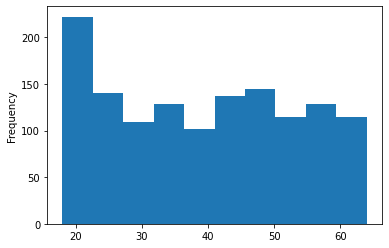

In [151]:

X['age'].plot(kind='hist')


<Axes: ylabel='Frequency'>

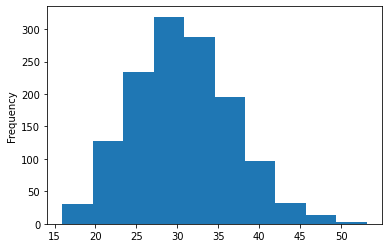

In [152]:
X['bmi'].plot(kind='hist')

In [154]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64